# Machine Learning Projects Portofolio
### Ketentuan Tugas :
1. Download File Template code disini : https://drive.google.com/drive/folders/1a-JwQ6Cj4xu_0keDLHtLD4o64_feXxzj?usp=sharing
2. Dibebaskan untuk men-download Dataset dari Kaggle, pilih untuk kasus supervised atau unsupervised.
3. Buatlah End to end project Machine Learning di local jupyter notebook / Google Collaboratory.
4. Ganti nama file : template_pr_day10.ipynb  dengan PR_day10_nama_siswa.ipynb
5. Upload Dataset yang digunakan ke Kaggle dan pilih mode private.
6. Pilih Create New Notebook (tulis insight yang ada didalam code projek dalam markdown) dan upload projek machine learning file jupyter notebook ke Kaggle
7. Upload file code dan ppt (jika ada) ke dalam github repository + file readme.
8. Tugas ini bersifat individu, dikumpulkan ke tim Dibimbing.id

## Import Libraries

source data: https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection


In [1]:
#Import libraries and dataset
import pandas as pd
import numpy as np

df = pd.read_csv('fraud_oracle.csv')

In [2]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


## Variables info:
1. Month                 
2. WeekOfMonth           
3. DayOfWeek             
4. Make                  
5. AccidentArea          
6. DayOfWeekClaimed     
7. MonthClaimed         
8. WeekOfMonthClaimed    
9. Sex                   
10. MaritalStatus      
11. Age                   
12. Fault                
13. PolicyType            
14. VehicleCategory       
15. VehiclePrice    
16. FraudFound_P    
17. PolicyNumber       
18. RepNumber            
19. Deductible         
20. DriverRating        
21. Days_Policy_Accident  
22. Days_Policy_Claim     
23. PastNumberOfClaims    
24. AgeOfVehicle          
25. AgeOfPolicyHolder     
26. PoliceReportFiled    
27. WitnessPresent        
28. AgentType             
29. NumberOfSuppliments  
30. AddressChange_Claim   
31. NumberOfCars         
32. Year                
33. BasePolicy        




## Data Cleaning

**Descriptive Statistic**

In [3]:
# Total dataset columns and rows check
df.shape

(15420, 33)

In [4]:
# Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

Missing Value Handling

In [5]:
# Missing data check
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [6]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= Month =================


Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: Month, dtype: int64


============= WeekOfMonth =================


3    3640
2    3558
4    3398
1    3187
5    1637
Name: WeekOfMonth, dtype: int64


============= DayOfWeek =================


Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: DayOfWeek, dtype: int64


============= Make =================


Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: Make, dtype: int64


============= AccidentArea =================


Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64


============= DayOfWeekClaimed =================


Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: DayOfWeekClaimed, dtype: int64


============= MonthClaimed =================


Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: MonthClaimed, dtype: int64


============= WeekOfMonthClaimed =================


2    3720
3    3583
1    3450
4    3433
5    1234
Name: WeekOfMonthClaimed, dtype: int64


============= Sex =================


Male      13000
Female     2420
Name: Sex, dtype: int64


============= MaritalStatus =================


Married     10625
Single       4684
Divorced       76
Widow          35
Name: MaritalStatus, dtype: int64


============= Age =================


30    596
33    574
34    573
35    569
28    560
     ... 
20     28
70     27
79     20
16      9
17      6
Name: Age, Length: 66, dtype: int64


============= Fault =================


Policy Holder    11230
Third Party       4190
Name: Fault, dtype: int64


============= PolicyType =================


Sedan - Collision       5584
Sedan - Liability       4987
Sedan - All Perils      4087
Sport - Collision        348
Utility - All Perils     340
Utility - Collision       30
Sport - All Perils        22
Utility - Liability       21
Sport - Liability          1
Name: PolicyType, dtype: int64


============= VehicleCategory =================


Sedan      9671
Sport      5358
Utility     391
Name: VehicleCategory, dtype: int64


============= VehiclePrice =================


20000 to 29000     8079
30000 to 39000     3533
more than 69000    2164
less than 20000    1096
40000 to 59000      461
60000 to 69000       87
Name: VehiclePrice, dtype: int64


============= FraudFound_P =================


0    14497
1      923
Name: FraudFound_P, dtype: int64


============= PolicyNumber =================


1        1
10361    1
10273    1
10274    1
10275    1
        ..
5145     1
5146     1
5147     1
5148     1
15420    1
Name: PolicyNumber, Length: 15420, dtype: int64


============= RepNumber =================


7     1069
9      999
1      987
5      987
10     986
12     977
15     977
16     967
2      956
3      949
11     948
6      942
14     941
8      931
4      912
13     892
Name: RepNumber, dtype: int64


============= Deductible =================


400    14838
700      311
500      263
300        8
Name: Deductible, dtype: int64


============= DriverRating =================


1    3944
3    3884
2    3801
4    3791
Name: DriverRating, dtype: int64


============= Days_Policy_Accident =================


more than 30    15247
none               55
8 to 15            55
15 to 30           49
1 to 7             14
Name: Days_Policy_Accident, dtype: int64


============= Days_Policy_Claim =================


more than 30    15342
15 to 30           56
8 to 15            21
none                1
Name: Days_Policy_Claim, dtype: int64


============= PastNumberOfClaims =================


2 to 4         5485
none           4352
1              3573
more than 4    2010
Name: PastNumberOfClaims, dtype: int64


============= AgeOfVehicle =================


7 years        5807
more than 7    3981
6 years        3448
5 years        1357
new             373
4 years         229
3 years         152
2 years          73
Name: AgeOfVehicle, dtype: int64


============= AgeOfPolicyHolder =================


31 to 35    5593
36 to 40    4043
41 to 50    2828
51 to 65    1392
26 to 30     613
over 65      508
16 to 17     320
21 to 25     108
18 to 20      15
Name: AgeOfPolicyHolder, dtype: int64


============= PoliceReportFiled =================


No     14992
Yes      428
Name: PoliceReportFiled, dtype: int64


============= WitnessPresent =================


No     15333
Yes       87
Name: WitnessPresent, dtype: int64


============= AgentType =================


External    15179
Internal      241
Name: AgentType, dtype: int64


============= NumberOfSuppliments =================


none           7047
more than 5    3867
1 to 2         2489
3 to 5         2017
Name: NumberOfSuppliments, dtype: int64


============= AddressChange_Claim =================


no change         14324
4 to 8 years        631
2 to 3 years        291
1 year              170
under 6 months        4
Name: AddressChange_Claim, dtype: int64


============= NumberOfCars =================


1 vehicle      14316
2 vehicles       709
3 to 4           372
5 to 8            21
more than 8        2
Name: NumberOfCars, dtype: int64


============= Year =================


1994    6142
1995    5195
1996    4083
Name: Year, dtype: int64


============= BasePolicy =================


Collision     5962
Liability     5009
All Perils    4449
Name: BasePolicy, dtype: int64

Missing value result indicates that there are missing value in some variables:


*   DayOfWeekClaimed = 0
*   MonthClaimed = 0
*   Days_Policy_Accident = none
*   Days_Policy_Claim = none

Fill the missing value using mode

In [7]:
# Mode imputation on DayOfWeekClaimed

mode_DayOfWeekClaimed = df[~df['DayOfWeekClaimed'].isin(['0'])]['DayOfWeekClaimed'].mode()[0]

df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].apply(lambda x: mode_DayOfWeekClaimed if x in ['0'] else x)

In [8]:
mode_DayOfWeekClaimed

'Monday'

In [9]:
df['DayOfWeekClaimed'].value_counts()

Monday       3758
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
Name: DayOfWeekClaimed, dtype: int64

In [10]:
# Mode imputation on MonthClaimed

mode_MonthClaimed = df[~df['MonthClaimed'].isin(['0'])]['MonthClaimed'].mode()[0]

df['MonthClaimed'] = df['MonthClaimed'].apply(lambda x: mode_MonthClaimed if x in ['0'] else x)

In [11]:
mode_MonthClaimed

'Jan'

In [12]:
df['MonthClaimed'].value_counts()

Jan    1447
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
Name: MonthClaimed, dtype: int64

In [13]:
# Mode imputation on Days_Policy_Accident

mode_Days_Policy_Accident = df[~df['Days_Policy_Accident'].isin(['none'])]['Days_Policy_Accident'].mode()[0]

df['Days_Policy_Accident'] = df['Days_Policy_Accident'].apply(lambda x: mode_Days_Policy_Accident if x in ['none'] else x)

In [14]:
mode_Days_Policy_Accident

'more than 30'

In [15]:
df['Days_Policy_Accident'].value_counts()

more than 30    15302
8 to 15            55
15 to 30           49
1 to 7             14
Name: Days_Policy_Accident, dtype: int64

In [16]:
# Mode imputation on Days_Policy_Claim

mode_Days_Policy_Claim = df[~df['Days_Policy_Claim'].isin(['none'])]['Days_Policy_Claim'].mode()[0]

df['Days_Policy_Claim'] = df['Days_Policy_Claim'].apply(lambda x: mode_Days_Policy_Claim if x in ['none'] else x)

In [17]:
mode_Days_Policy_Claim

'more than 30'

In [18]:
df['Days_Policy_Claim'].value_counts()

more than 30    15343
15 to 30           56
8 to 15            21
Name: Days_Policy_Claim, dtype: int64

**Duplicate data check**

In [19]:
# Duplicate data check
df.duplicated().sum()

0

**Drop variables PolicyNumber**

In [20]:
# Drop PolicyNumber column
df = df.drop(columns=['PolicyNumber'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

## Heatmap Correlation

<ipython-input-22-2e75bb25e998>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


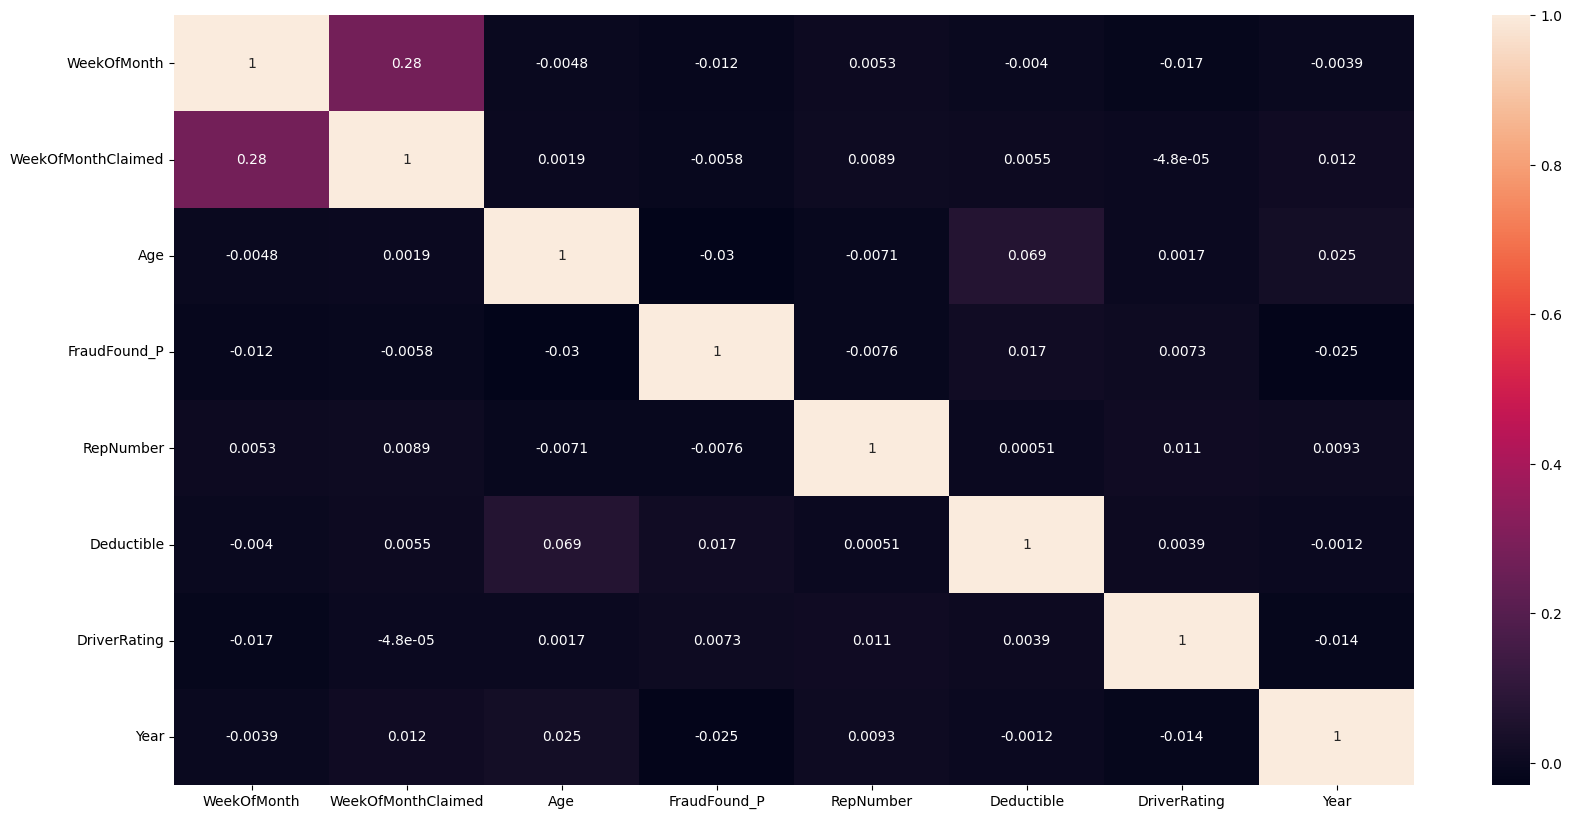

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

**Pearson Correlation Coefficieant**

According to the graph above, there are no variables highly correlated due to the value is below 0.5

## Exploratory Data Analysis

The result of info running shows that:

*   Categorical Data: Month, DayOfWeek, Make, AccidentArea, DayOfWeekClaimed, MonthClaimed, Sex, MaritalStatus, Fault, PolicyType, VehicleCategory, VehiclePrice, Days_Policy_Accident, Days_Policy_Claim, PastNumberOfClaims, AgeOfVehicle, AgeOfPolicyHolder, PolicyReportFiled, WitnessPresent, AgentType,NumberOfSuppliments, AddressChange_Claim, NumberOfCars, BasePolicy
*   Numerical Data: WeekOfMonth, WeekOfMonthClaimed, Age, FroudFound_P, RepNumber, Deductible, DriverRating, Year



**A. Categorical Data**

In [23]:
def categorical_data(title):
    plt.figure(figsize=(17,8))

    # calculate proportion values for each category
    prop_df = df.groupby([title, 'FraudFound_P']).size().reset_index(name='count')
    prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())

    g=sns.catplot(x=title, y='prop', kind='bar', hue='FraudFound_P', palette='viridis', data=prop_df, height=8.27, aspect=11.7/8.27)
    #displays the value of each barplot
    ax = g.facet_axis(0,0)
    for p in ax.patches:
       ax.text(p.get_x() + p.get_width() / 2.,
            p.get_height(),
            '{0:.2f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large', ha='center')
    plt.show()

<ipython-input-23-aa467504fff3>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

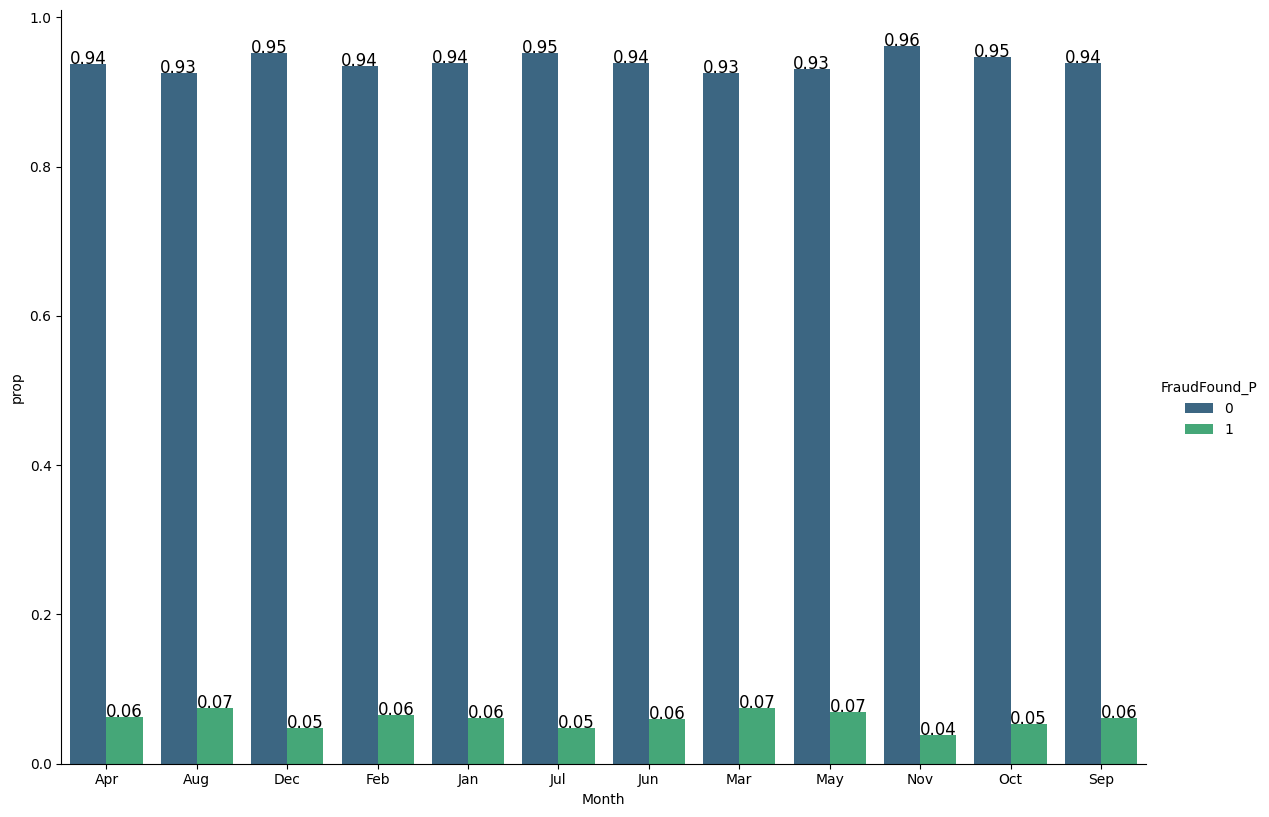

In [24]:
categorical_data("Month")

<ipython-input-23-aa467504fff3>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

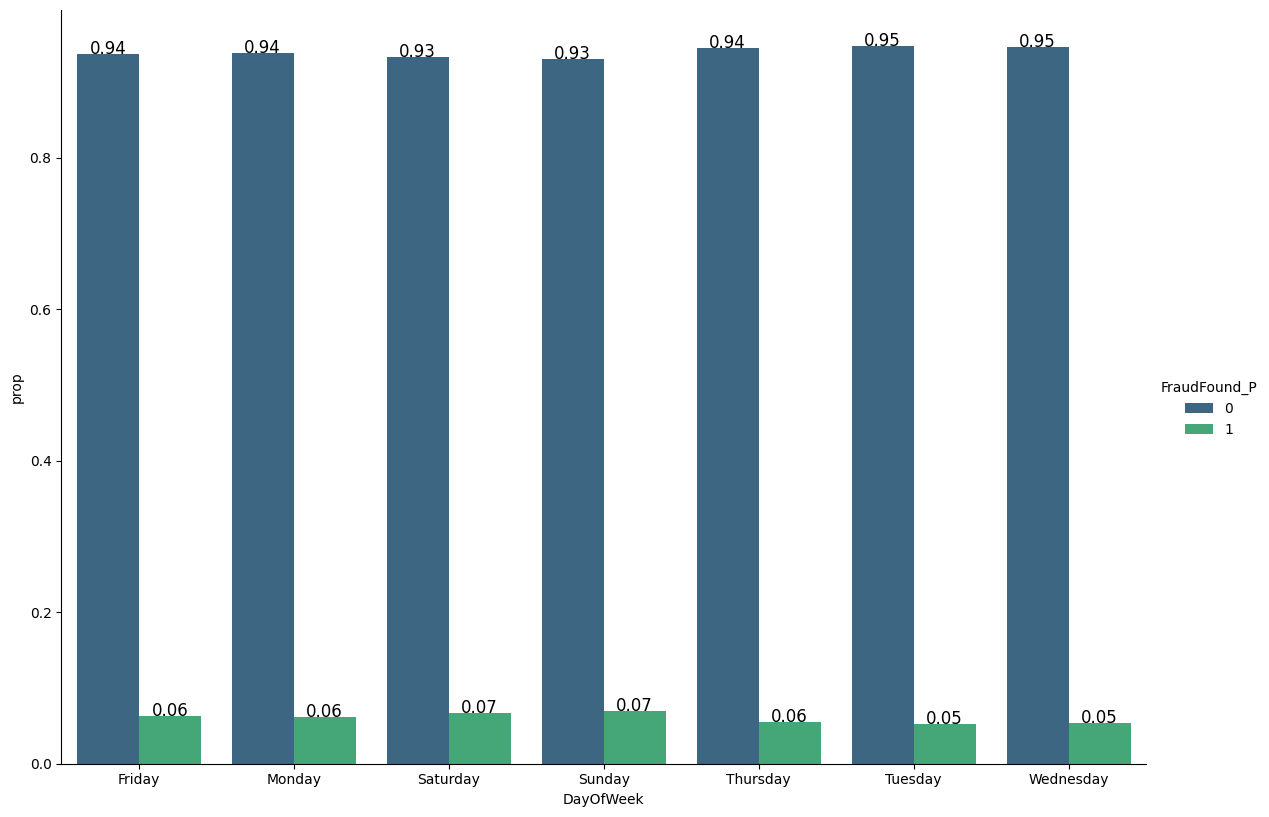

In [25]:
categorical_data("DayOfWeek")

<ipython-input-49-aa467504fff3>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

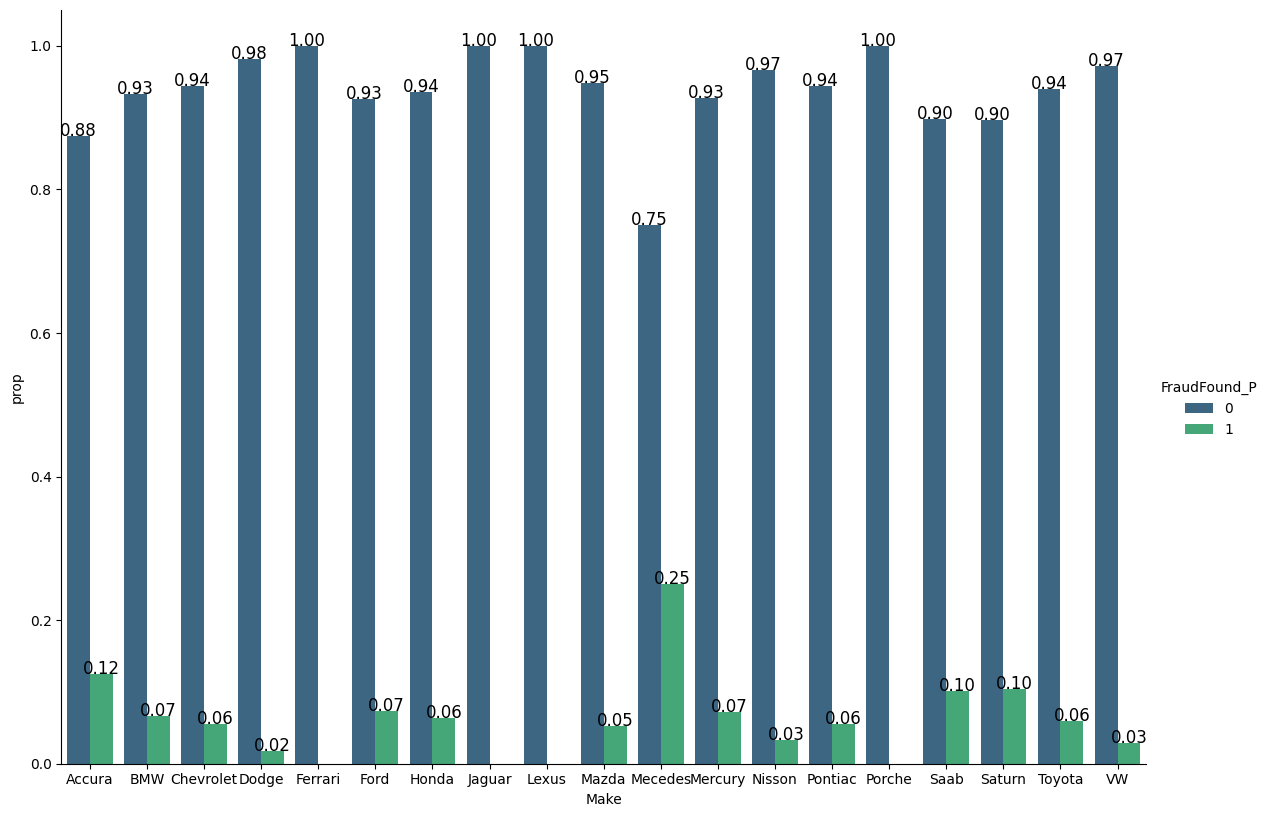

In [ ]:
categorical_data("Make")

<ipython-input-49-aa467504fff3>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

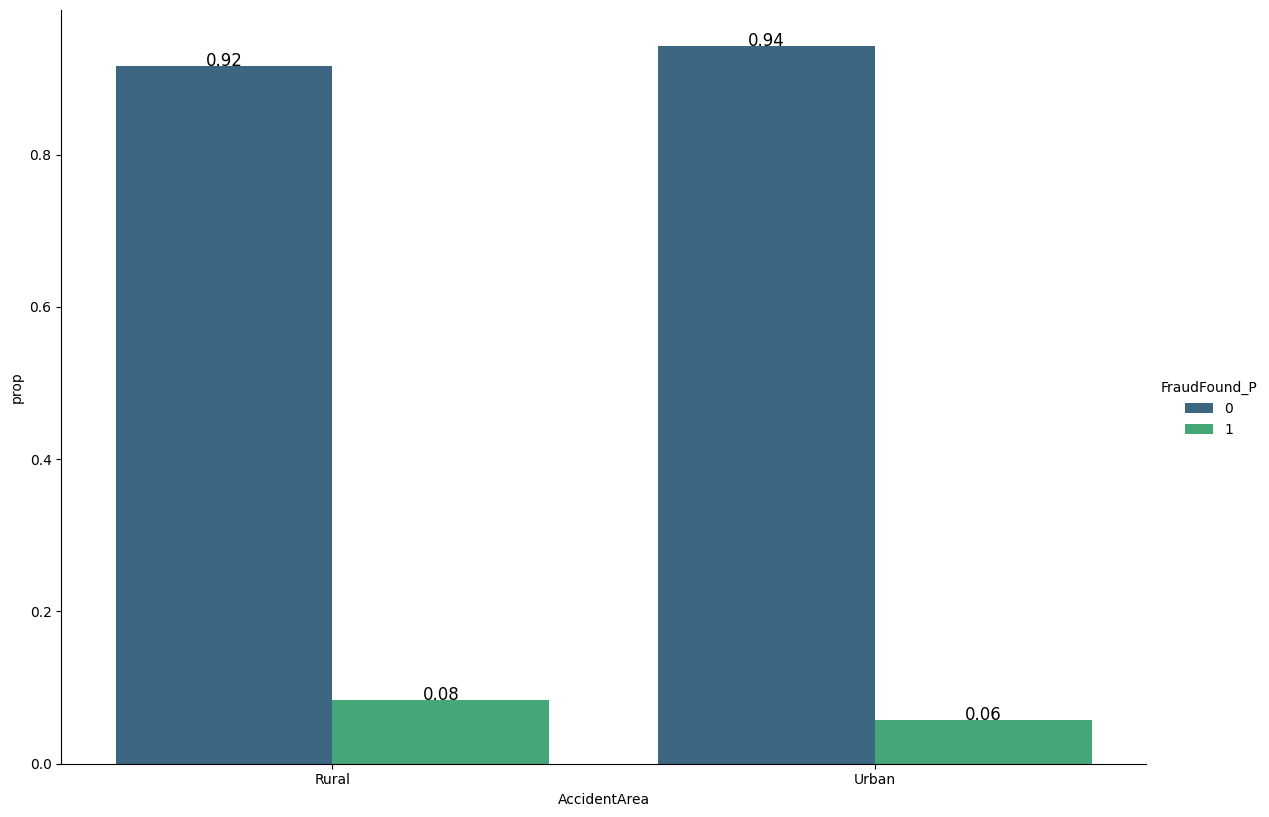

In [ ]:
categorical_data("AccidentArea")

<ipython-input-49-aa467504fff3>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

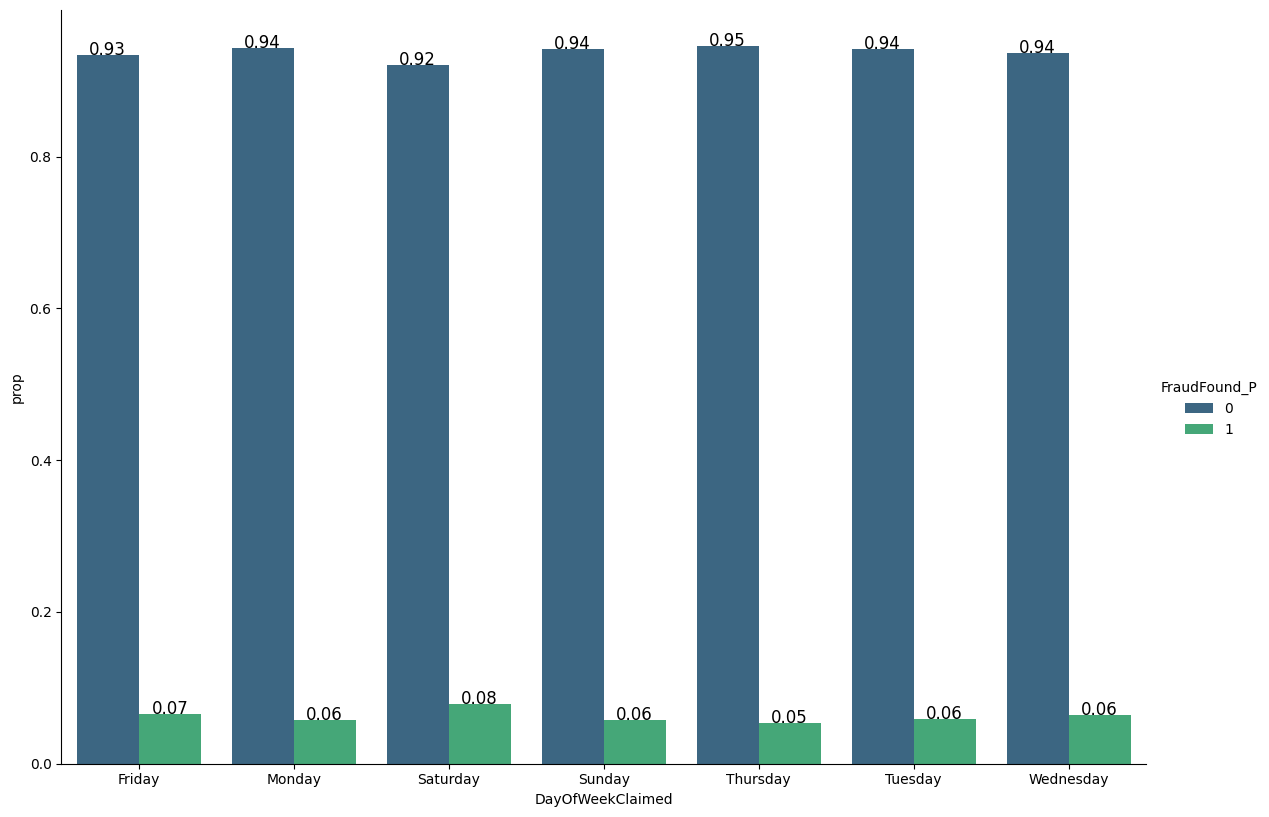

In [ ]:
categorical_data("DayOfWeekClaimed")

<ipython-input-49-aa467504fff3>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

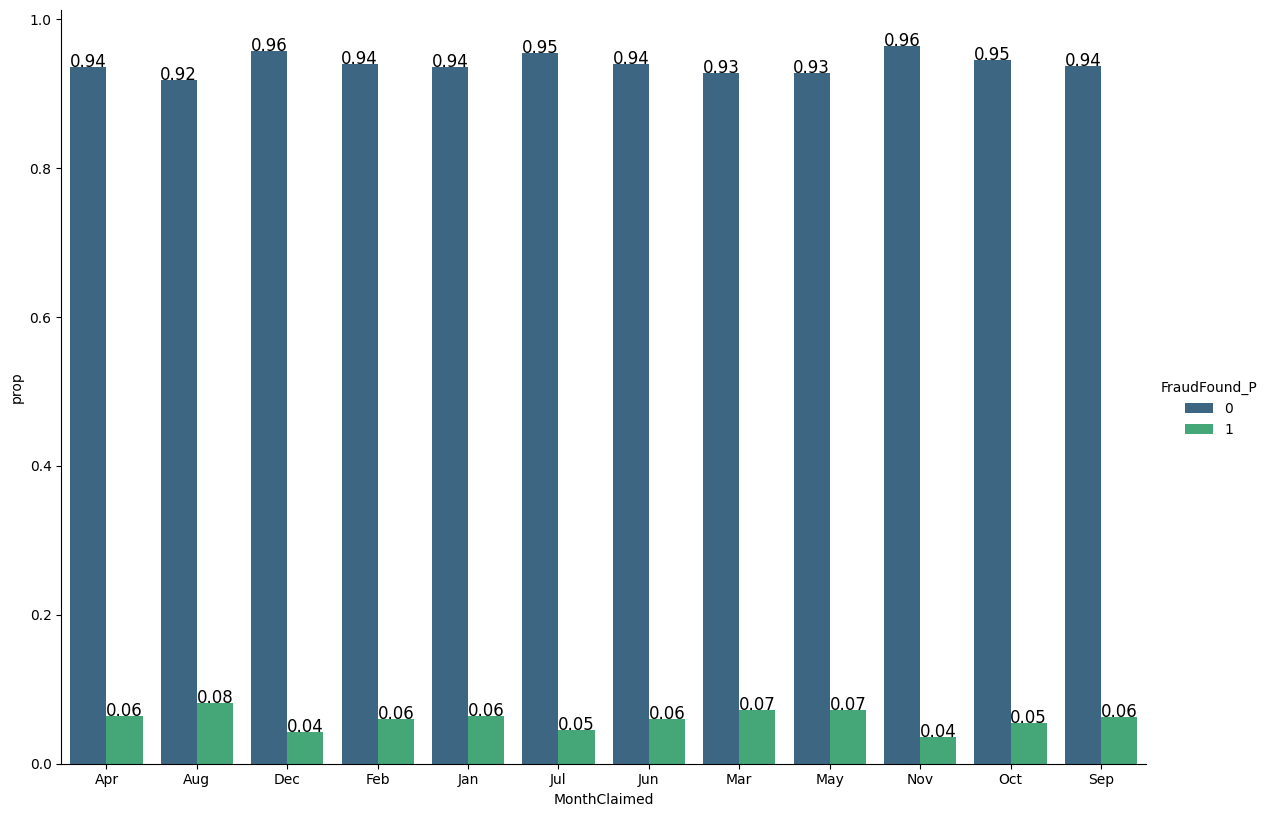

In [ ]:
categorical_data("MonthClaimed")

<ipython-input-49-aa467504fff3>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

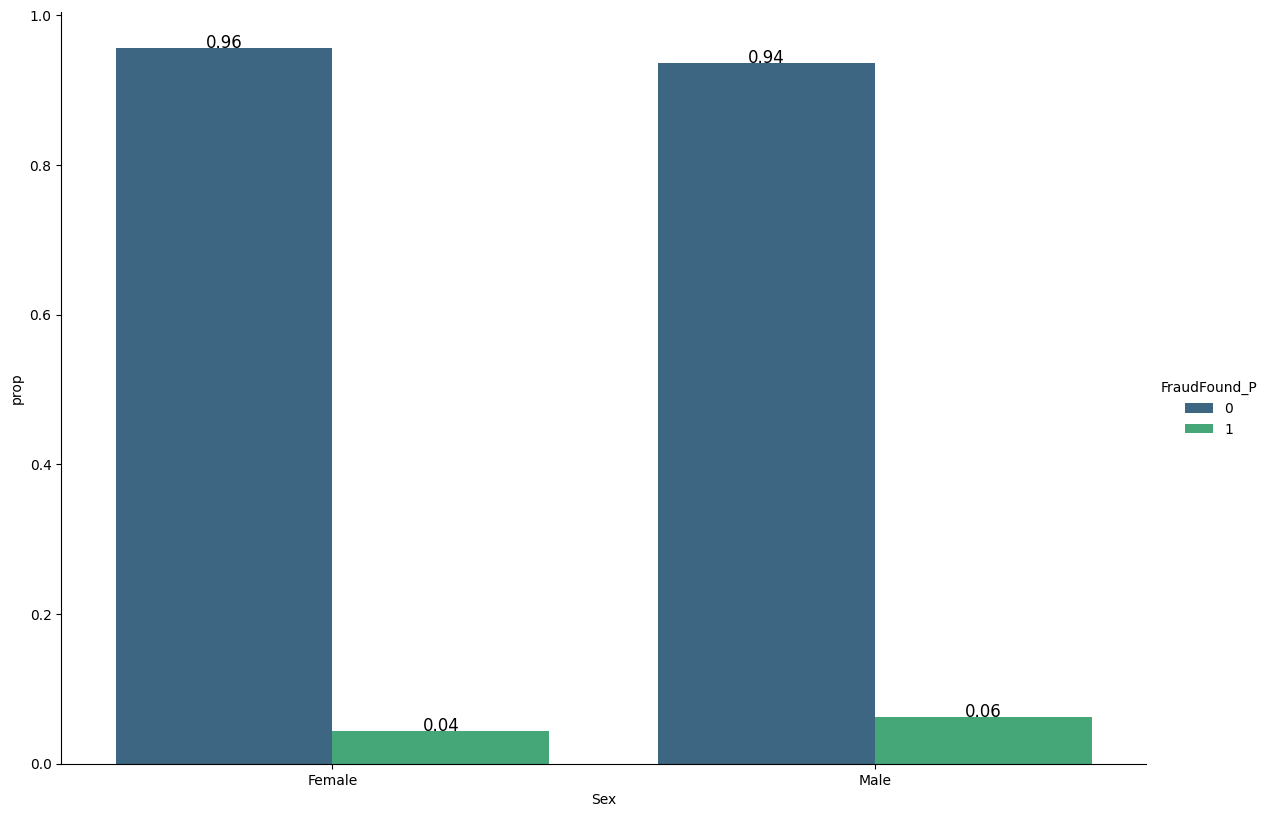

In [ ]:
categorical_data("Sex")

<ipython-input-49-aa467504fff3>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

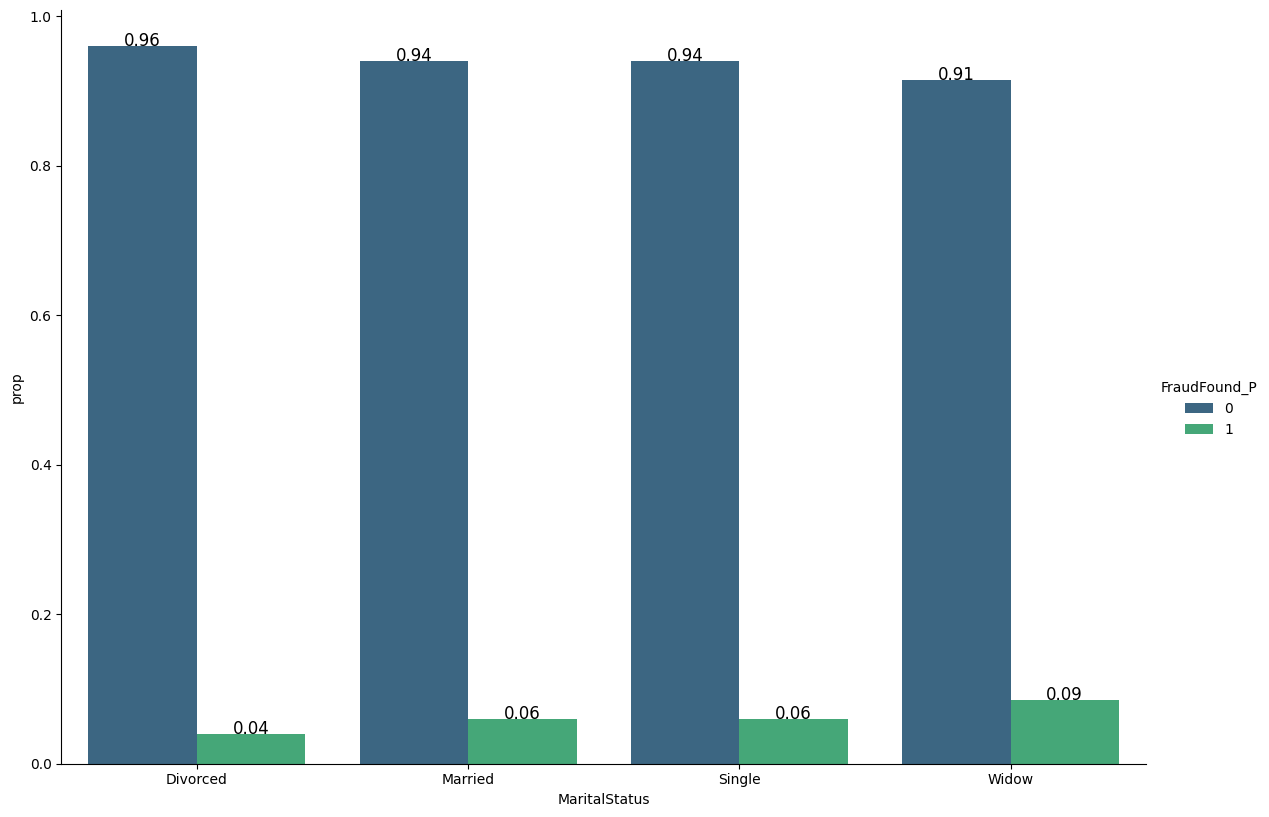

In [ ]:
categorical_data("MaritalStatus")

<ipython-input-49-aa467504fff3>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

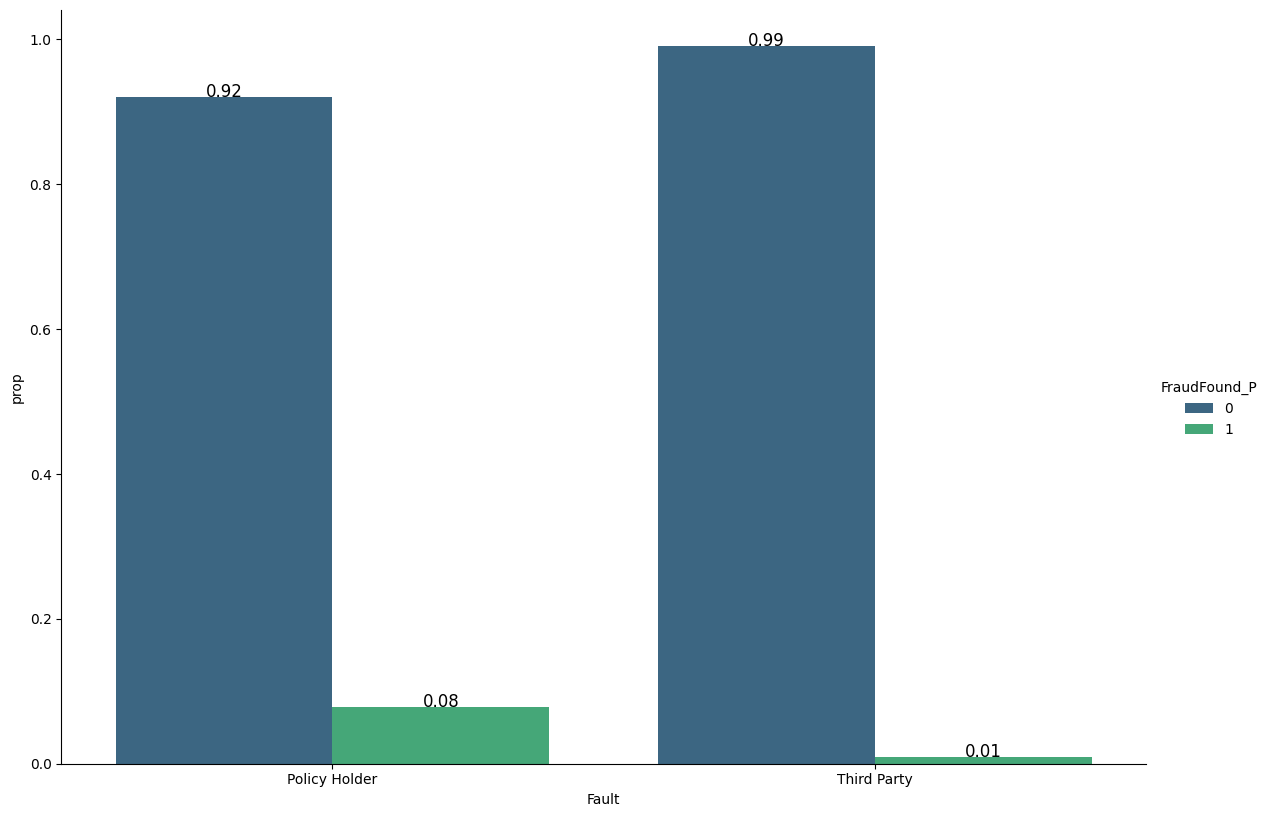

In [ ]:
categorical_data("Fault")

<ipython-input-49-aa467504fff3>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

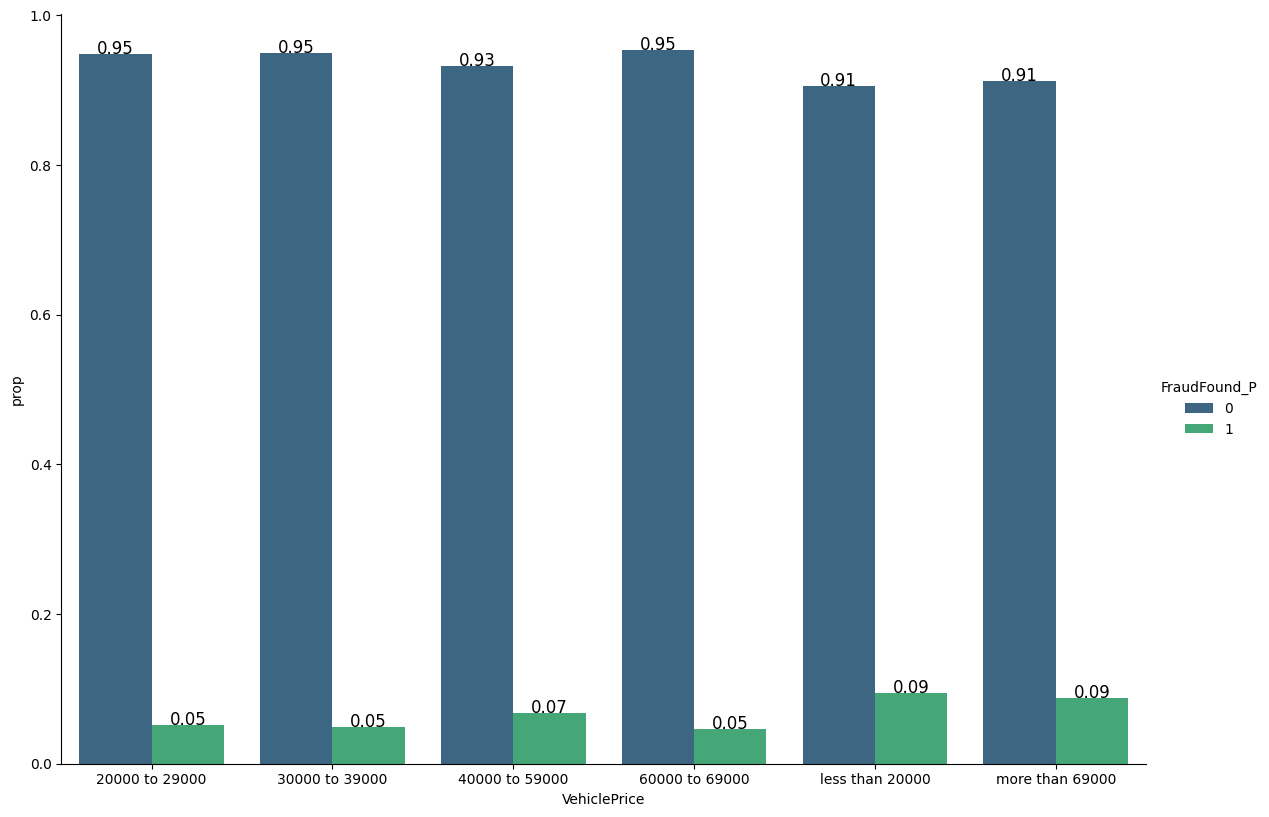

In [ ]:
categorical_data("VehiclePrice")

<ipython-input-49-aa467504fff3>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

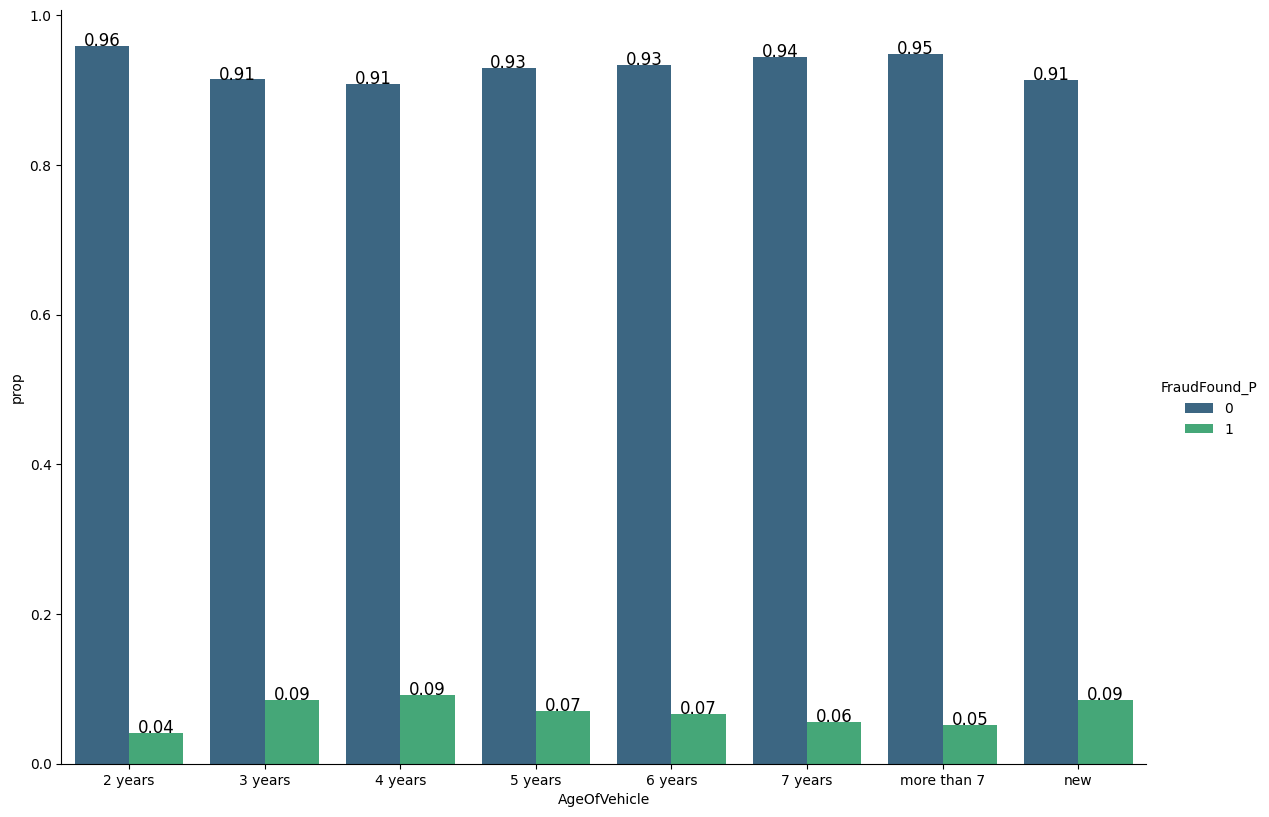

In [ ]:
categorical_data("AgeOfVehicle")

<ipython-input-49-aa467504fff3>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

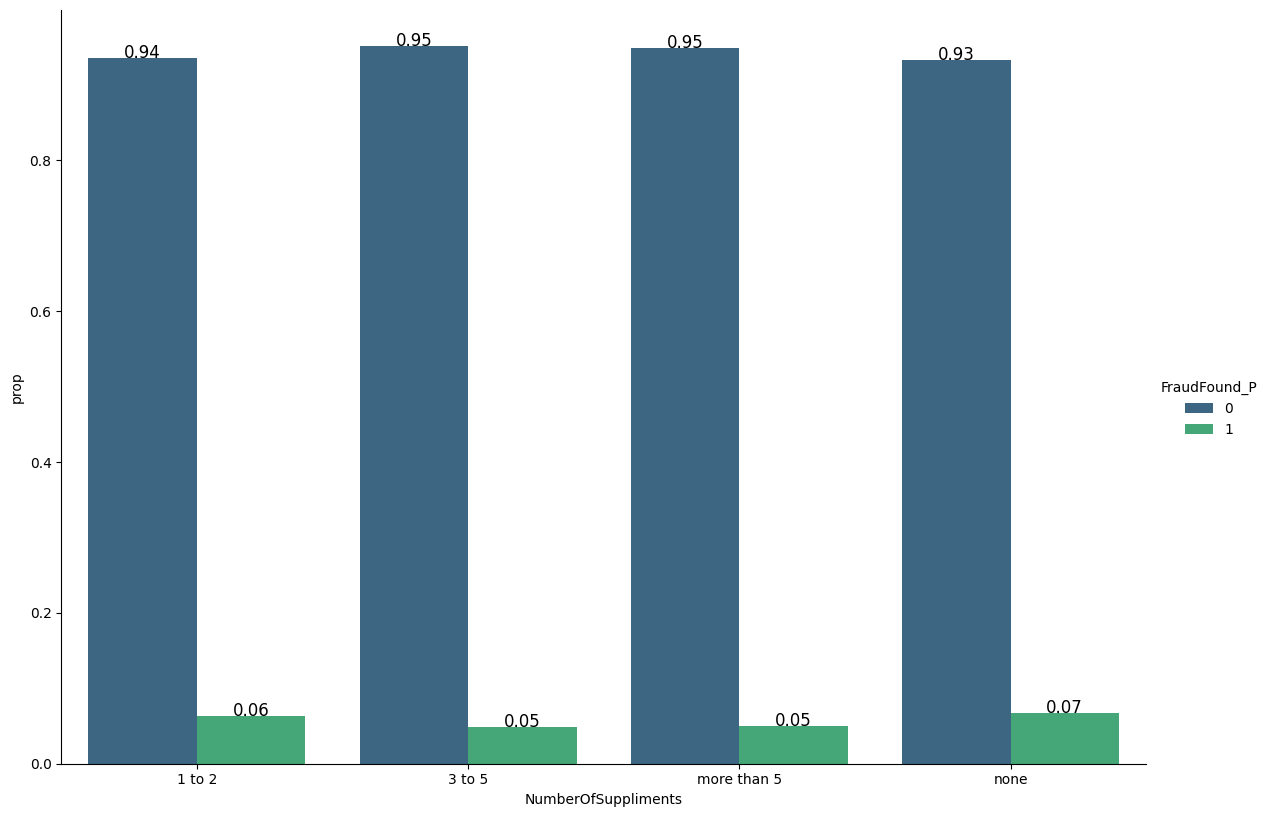

In [ ]:
categorical_data("NumberOfSuppliments")

<ipython-input-49-aa467504fff3>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

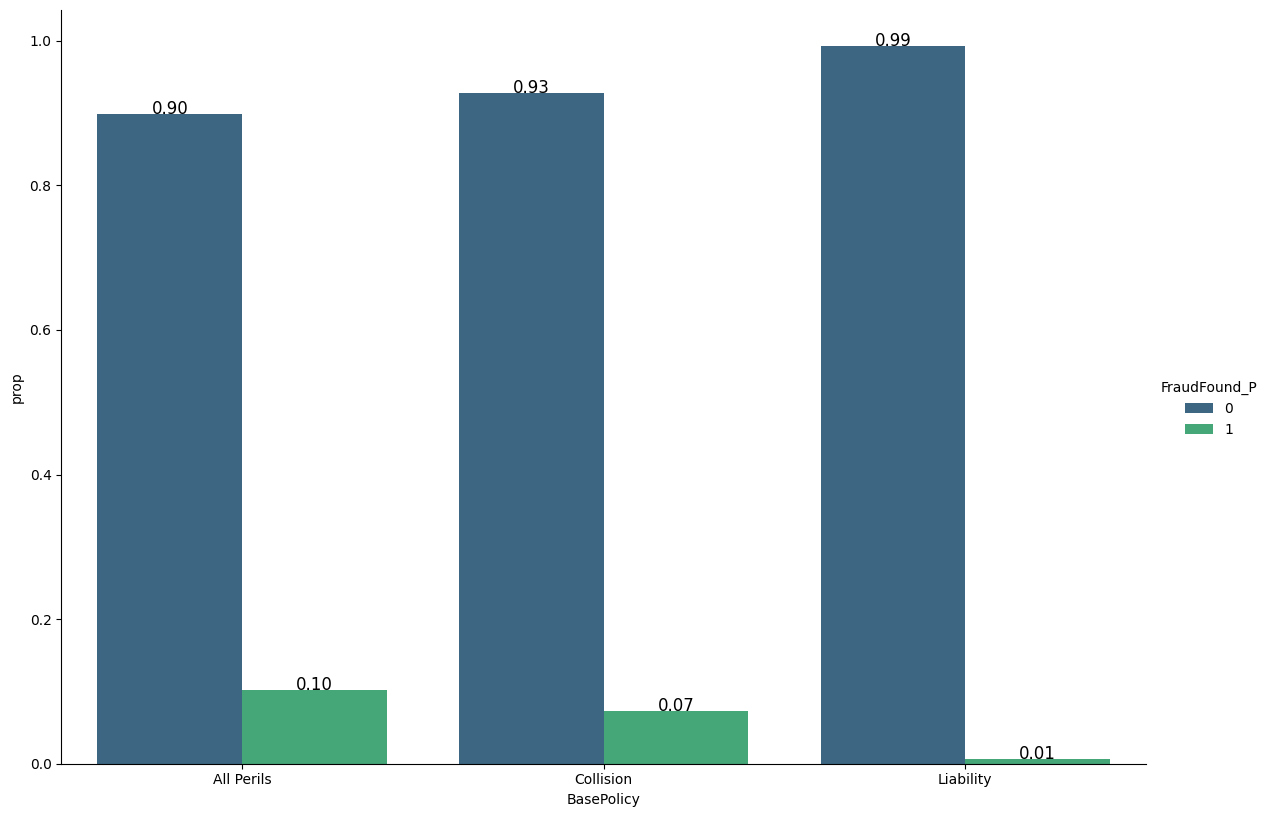

In [ ]:
categorical_data("BasePolicy")

**B. Numerical Data**

In [ ]:
# desciptive analysis for numerical columns
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,16.000000,700.000000,4.000000,1996.000000


In [ ]:
def dist_bivariate(title):
    sns.FacetGrid(df,hue='FraudFound_P',palette='cubehelix').map(sns.distplot,title).add_legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


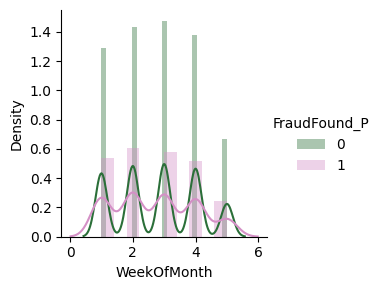

In [ ]:
dist_bivariate('WeekOfMonth')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


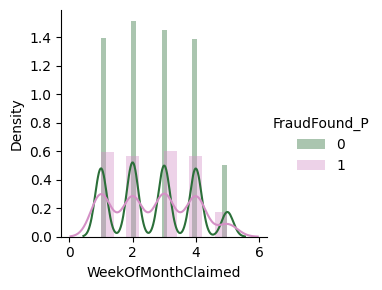

In [ ]:
dist_bivariate('WeekOfMonthClaimed')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


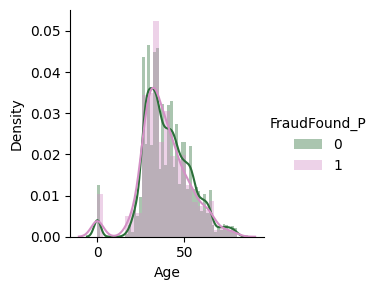

In [ ]:
dist_bivariate('Age')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


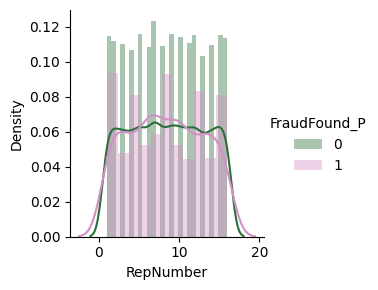

In [ ]:
dist_bivariate('RepNumber')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


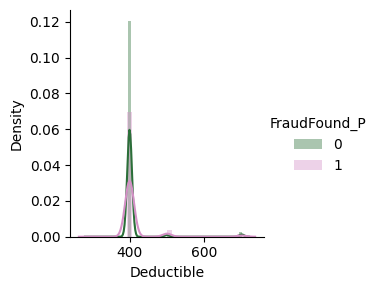

In [ ]:
dist_bivariate('Deductible')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


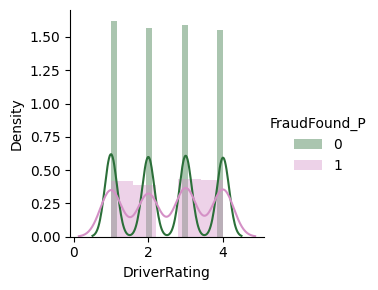

In [ ]:
dist_bivariate('DriverRating')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


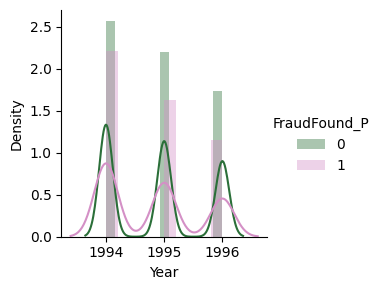

In [ ]:
dist_bivariate('Year')

# Outlier Checking

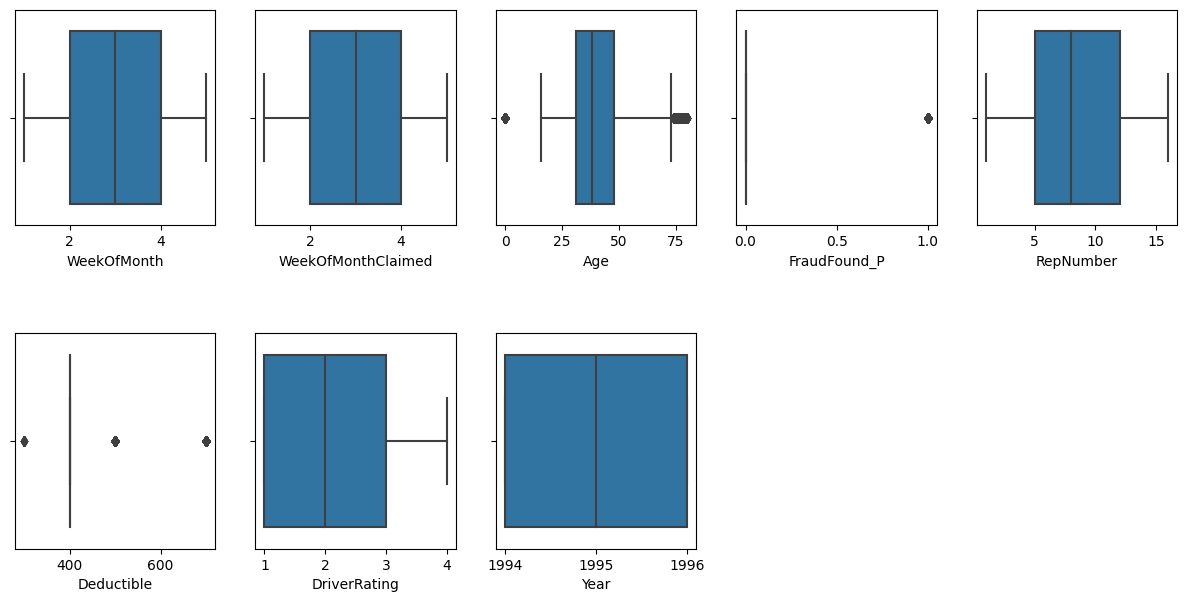

In [ ]:
# Column List with Numerical data
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# numeric_cols = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P', 'RepNumber', 'Deductible', 'DriverRating', 'Year']

# Create boxplot
plt.figure(figsize=(15, 7))

for i, col in enumerate(numeric_cols, 1):
  plt.subplot(2, 5, i,)
  sns.boxplot(data=df, x=col)
  plt.subplots_adjust(hspace=0.5)

plt.show()

There are outliers in Age and Deductible. In this case, logaritma transform will be conducted

In [ ]:
# Buat list berisi kolom yang akan ditransform
cols_to_transform = ['Age', 'Deductible']

# Lakukan iterasi atas log transform pada setiap kolom
for col in cols_to_transform:
  df[col] = np.log1p(df[col])

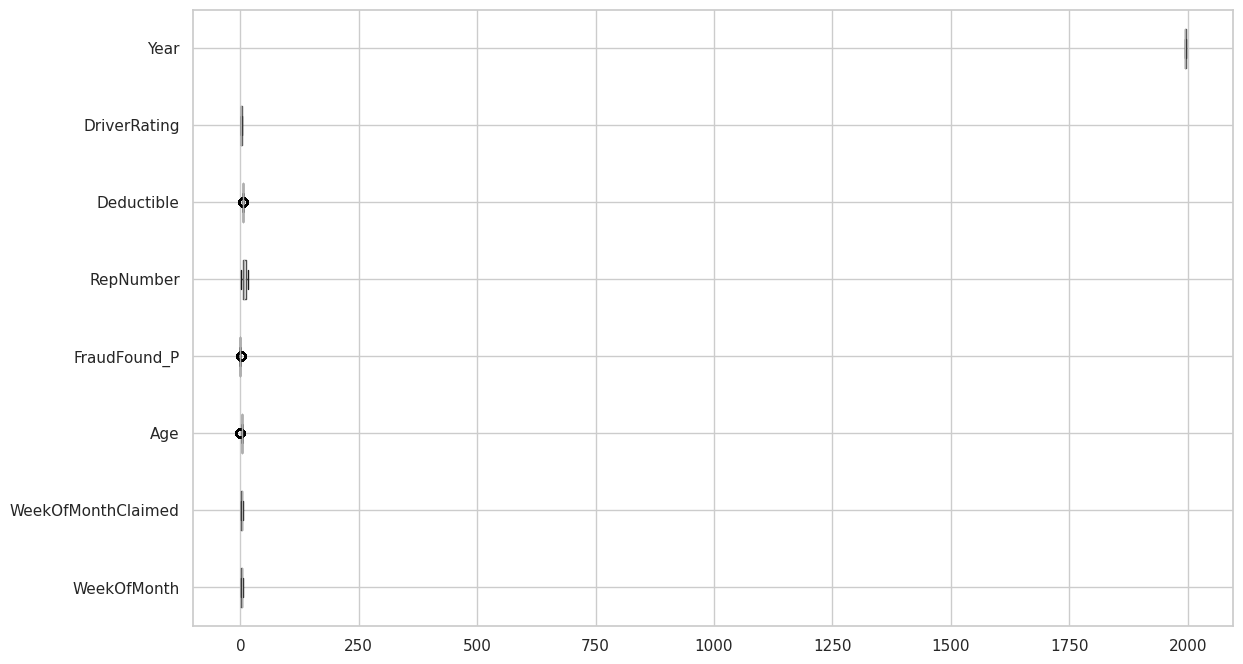

In [ ]:
# Outlier Analysis checking again

plt.figure(figsize=(16, 8))

# Create Boxplot
df.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

# Data Preprocessing

# Splitting Features (X) and Target (Y)

In [32]:
# Split features and target
X = df.drop(columns='FraudFound_P')
y = df['FraudFound_P']

print(X.shape, y.shape)

(15420, 31) (15420,)


# Scaling Numerical Variables

In this study, StandardScaler method will be employed to scale numerical variables and ensure all features have the same scale

In [31]:
from sklearn.preprocessing import StandardScaler

num_cols_scale = X.select_dtypes(include=['int64', 'float64']).columns

# Melakukan scaling data
scaler = StandardScaler()
X[num_cols_scale] = scaler.fit_transform(X[num_cols_scale])

# Encoding Categorical Variables


Besides features numerical scaling, encoding variables for non numerical object will be conducted using One Hot Encoding (OHE)

In [37]:
# Encoding categorical variables
encode_ohe = ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',
              'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice',
              'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
              'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
              'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']
X = pd.get_dummies(X, columns=encode_ohe)

In [38]:
X.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,Month_Apr,Month_Aug,Month_Dec,...,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21,12,300,1,1994,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,3,4,34,15,400,4,1994,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2,5,2,47,7,400,3,1994,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,2,1,65,4,400,2,1994,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,5,2,27,3,400,1,1994,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [39]:
X

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,Month_Apr,Month_Aug,Month_Dec,...,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21,12,300,1,1994,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,3,4,34,15,400,4,1994,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2,5,2,47,7,400,3,1994,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,2,1,65,4,400,2,1994,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,5,2,27,3,400,1,1994,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,5,35,5,400,4,1996,0,0,0,...,1,0,1,0,0,0,0,0,1,0
15416,5,1,30,11,400,3,1996,0,0,0,...,1,0,0,0,1,0,0,0,0,1
15417,5,1,24,4,400,4,1996,0,0,0,...,1,0,1,0,0,0,0,0,1,0
15418,1,2,34,6,400,4,1996,0,0,1,...,1,0,1,0,0,0,0,1,0,0


In [40]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15420, dtype: int64

# Split Training and Testing Data


Ratio = 80/20, means that 80% is used for training and the remaining (20%) is used for testing data

In [41]:
from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [42]:
# Check the total data of each subsets
print('Data Training: X', X_train.shape, 'Y', y_train.shape)
print('Data Test: X', X_test.shape, 'Y', y_test.shape)

Data Training: X (12336, 143) Y (12336,)
Data Test: X (3084, 143) Y (3084,)


In [43]:
X_train.head(10)

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,Month_Apr,Month_Aug,Month_Dec,...,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
8294,3,3,23,6,400,4,1995,0,0,0,...,1,0,1,0,0,0,0,0,1,0
9591,3,3,34,4,400,1,1995,0,0,0,...,1,0,1,0,0,0,0,0,0,1
14227,2,2,45,6,400,4,1996,0,0,0,...,1,0,0,0,1,0,0,0,1,0
14863,3,3,40,13,400,1,1996,0,0,0,...,1,0,1,0,0,0,0,0,0,1
6994,3,5,28,13,400,1,1995,0,0,0,...,1,0,1,0,0,0,0,1,0,0
12081,4,1,28,7,400,1,1996,0,0,0,...,1,0,1,0,0,0,0,0,0,1
668,5,1,32,12,400,2,1994,0,1,0,...,1,0,1,0,0,0,0,0,1,0
1893,3,3,55,5,400,2,1994,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4077,4,4,26,16,400,2,1994,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3749,5,1,53,13,400,1,1994,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [44]:
X_test.head(10)

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,Month_Apr,Month_Aug,Month_Dec,...,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
8922,1,3,41,16,400,4,1995,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4274,2,3,23,12,400,2,1994,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3408,4,4,36,5,400,3,1994,0,0,1,...,1,0,1,0,0,0,0,1,0,0
10675,1,3,43,3,400,3,1995,1,0,0,...,1,0,1,0,0,0,0,0,1,0
3285,2,3,52,5,400,3,1994,0,0,0,...,1,0,1,0,0,0,0,0,0,1
11043,4,5,51,1,400,1,1995,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3495,4,1,49,2,400,3,1994,0,0,0,...,1,0,1,0,0,0,0,0,1,0
9299,3,1,35,9,400,1,1995,0,0,0,...,1,0,1,0,0,0,0,1,0,0
10652,1,2,37,6,400,4,1995,0,0,0,...,1,0,1,0,0,0,0,1,0,0
13126,2,2,50,16,400,3,1996,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [45]:
y_train.head()

8294     0
9591     0
14227    0
14863    0
6994     0
Name: FraudFound_P, dtype: int64

In [46]:
y_test.head()

8922     0
4274     0
3408     0
10675    0
3285     0
Name: FraudFound_P, dtype: int64

# Baseline Model

In this project, classification methods for modelling that will be employed are:
1. Logistic Regression
2. K-Nearest Neighbours (KNN)
3. Naive Bayes
4. Support Vector Machine

# 1. Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

# Instantiate classifier
logistic_regression = LogisticRegression()

# Fit model to training data
logistic_regression.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Predict test data on logistic regression
print(f"Test Accuracy : {logistic_regression.score(X_test, y_test)*100} %" )
print(f"Train Accuracy : {logistic_regression.score(X_train, y_train)*100} %" )

Test Accuracy : 94.00129701686122 %
Train Accuracy : 94.01750972762646 %


# 2. K-Nearest Neighbours (KNN)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

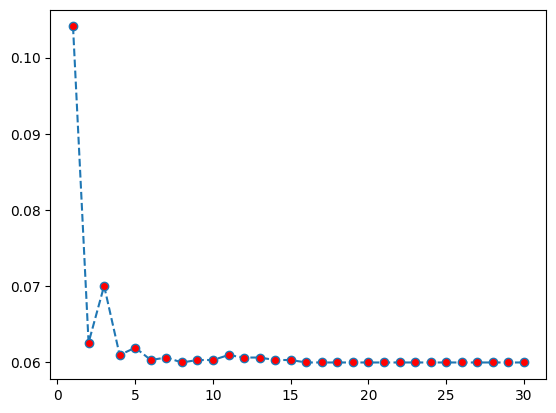

In [49]:
from sklearn.neighbors import KNeighborsClassifier
# finding the K value
error = []

for i in range(1,31,1):
    knn =  KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    preds = knn.predict(X_test.values)
    error.append(np.mean(preds!=y_test))

plt.plot(range(1,31,1), error, linestyle = 'dashed', marker ='o', mfc= 'red')
plt.show()

In [50]:
#Fit the training sets to the model.

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [51]:
from sklearn.metrics import accuracy_score

#knn_model = knn.predict(Xtest)
print(f"Accuracy : {accuracy_score(y_test, knn.predict(X_test.values))*100} %" )

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy : 93.74189364461738 %


In [52]:
# Predicting the test and train results

knn_model = knn.predict(X_test.values)
knn_modeltrain = knn.predict(X_train.values)
#knn.score(scaled_Xtest, ytest)
#accuracy_score(ytest, knn_model)
print(f"Test Accuracy : {accuracy_score(y_test, knn_model)*100} %" )
print(f"Train Accuracy : {accuracy_score(y_train, knn_modeltrain)*100} %" )

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Test Accuracy : 93.74189364461738 %
Train Accuracy : 94.77950713359273 %


# 3. Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB # choose model class
naive_model = GaussianNB() # instantiate model

naive_model.fit(X_train, y_train)

GaussianNB()

In [54]:
# Predict testing test and testing train
y_naive_model_model = naive_model.predict(X_test)
y_naive_model_model_train = naive_model.predict(X_train)

In [55]:
from sklearn.metrics import accuracy_score

#accuracy_score(ytest, y_naive_model_model)
print(f"Test Accuracy : {accuracy_score(y_test, y_naive_model_model)*100} %" )
print(f"Train Accuracy : {accuracy_score(y_train, y_naive_model_model_train)*100} %" )

Test Accuracy : 45.91439688715953 %
Train Accuracy : 46.46562905317769 %


# 4. Support Vector Machine


In [56]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Create a linear SVM classifier
svm_model = SVC()

# Train classfier
svm_model.fit(X_train, y_train)

# Take the model that was trained on the Xtrain data and apply it to the X_test
y_pred_svm = svm_model.predict(X_test)

# Calculation of accuracy Data Test
svmScore = svm_model.score(X_test, y_test)
svmScoreTrain = svm_model.score(X_train,y_train)

# Calculation of confusion matrix
svmMatrix = confusion_matrix(y_test, y_pred_svm)

# Print output
print(f"Test Accuracy : {svmScore*100} %")
print(f"Train Accuracy : {svmScoreTrain*100} %")

Test Accuracy : 94.00129701686122 %
Train Accuracy : 94.01750972762646 %


# Evaluation Model

In [57]:
# Gabungkan data X_train dan X_test sebelum melakukan learning curve
X = pd.concat([X_train, X_test], axis=0)

# Gabungkan data ytrain dan ytest sebelum melakukan learning curve
y = pd.concat([y_train, y_test], axis=0)

In [58]:
X

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,Month_Apr,Month_Aug,Month_Dec,...,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
8294,3,3,23,6,400,4,1995,0,0,0,...,1,0,1,0,0,0,0,0,1,0
9591,3,3,34,4,400,1,1995,0,0,0,...,1,0,1,0,0,0,0,0,0,1
14227,2,2,45,6,400,4,1996,0,0,0,...,1,0,0,0,1,0,0,0,1,0
14863,3,3,40,13,400,1,1996,0,0,0,...,1,0,1,0,0,0,0,0,0,1
6994,3,5,28,13,400,1,1995,0,0,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5928,2,3,59,15,400,4,1994,0,0,0,...,1,0,1,0,0,0,0,1,0,0
6533,3,4,54,13,400,1,1995,0,0,0,...,1,0,1,0,0,0,0,1,0,0
15345,2,3,46,11,700,1,1996,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4004,1,1,42,11,400,1,1994,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [59]:
y

8294     0
9591     0
14227    0
14863    0
6994     0
        ..
5928     0
6533     0
15345    1
4004     0
5260     0
Name: FraudFound_P, Length: 15420, dtype: int64

## 1. Learning Curve

In [60]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np


def plot_learning_curve_classification(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel(scoring)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training " + scoring)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing " + scoring)

    plt.legend(loc="best")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

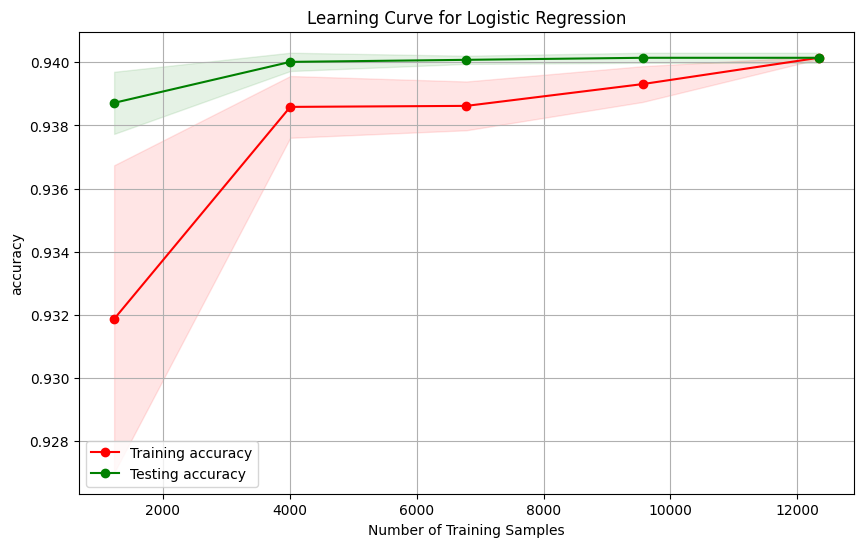

In [61]:
# Learning Curve for Logistic Regression
plot_learning_curve_classification(logistic_regression, X, y, cv=5, scoring='accuracy', title="Learning Curve for Logistic Regression")

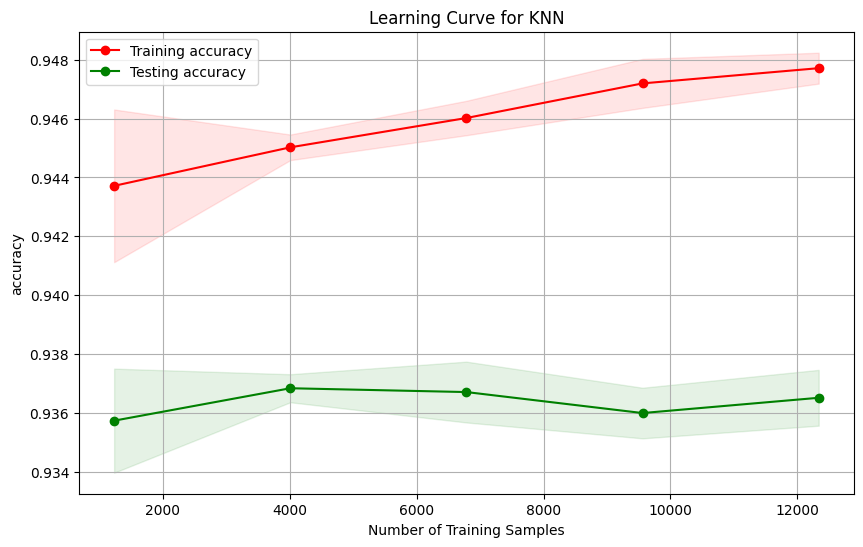

In [62]:
# Learning Curve for KNN
plot_learning_curve_classification(knn, X, y, cv=5, scoring='accuracy', title="Learning Curve for KNN")

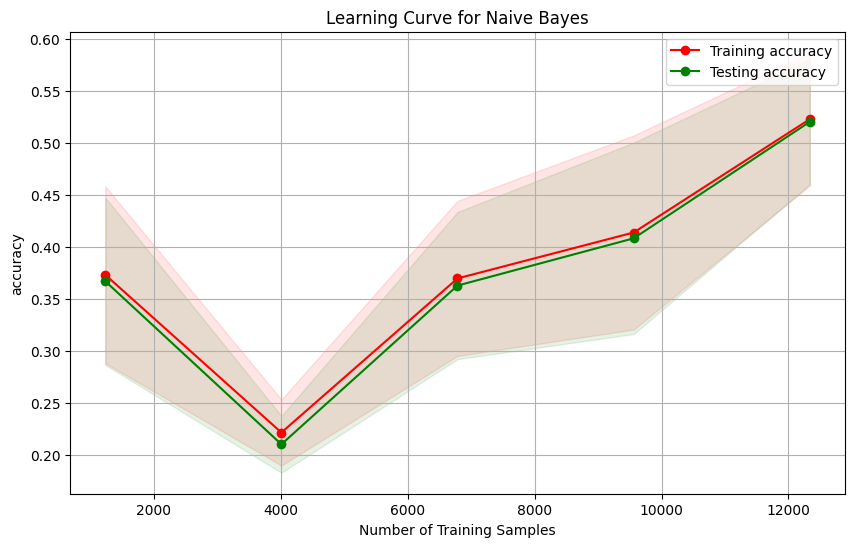

In [63]:
# Learning Curve for Naive Bayes
plot_learning_curve_classification(naive_model, X, y, cv=5, scoring='accuracy', title="Learning Curve for Naive Bayes")

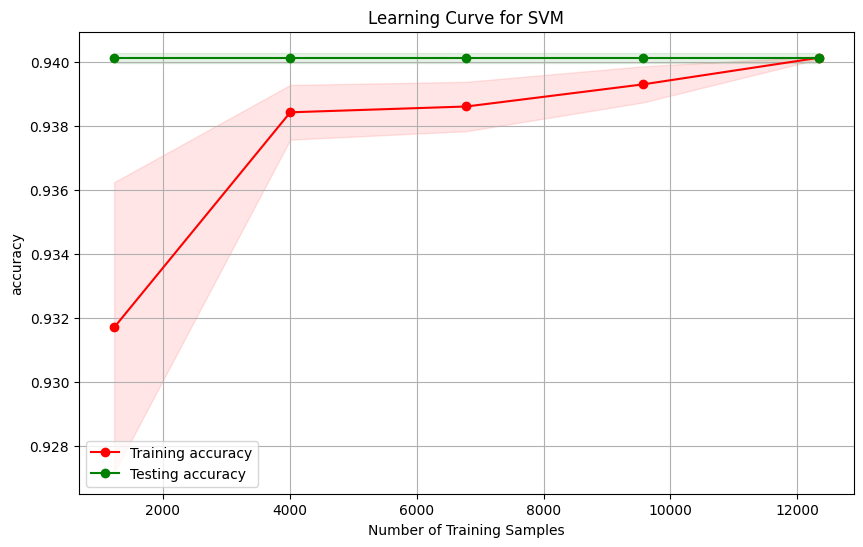

In [64]:
# Learning Curve for SVM
plot_learning_curve_classification(svm_model, X, y, cv=5, scoring='accuracy', title="Learning Curve for SVM")

According to the output of Learning Curve evaluation model:
1. Logistic Regression: normal indication as increasingly covergent between training and testing accuracy
2. KNN: overfitting indication as gap is wide between training and testing accuracy
3. Naive Bayes: underfitting indication as both the accuracy of training and testing fall significantly
4. SVM: normal indication as increasingly covergent between training and testing accuracy

Therefore, the most satisfying result of learning curve model is SVM model.

# 2. Confusion Matrix

In [65]:
# Confusion matrix function
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, classification_report

def model_evaluation(model,name):

    confusion_matrix = pd.crosstab(y_test, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

    target_names = ['No' , 'Yes']
    print ('Accuracy:', accuracy_score(y_test, model))
    print ('Precision:', precision_score(y_test, model,pos_label=1))
    print ('F1 score:', f1_score(y_test, model,pos_label=1))
    print ('Recall:', recall_score(y_test, model,pos_label=1))
    print ('\n clasification report:\n', classification_report(y_test,model,target_names=target_names))

In [66]:
def evaluate(model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train):
    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))

    y_pred = model.predict(x_test)
    print('======= Data Test =======')
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Test:', accuracy_score(y_test, y_pred))
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))



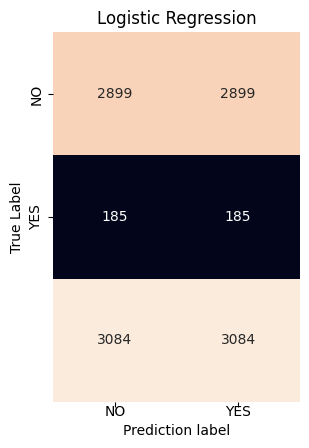

Accuracy: 0.9400129701686122
Precision: 0.0
F1 score: 0.0
Recall: 0.0

 clasification report:
               precision    recall  f1-score   support

          No       0.94      1.00      0.97      2899
         Yes       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

In [67]:
# Logistic Regression
lr_y_pred = logistic_regression.predict(X_test)
model_evaluation(lr_y_pred,"Logistic Regression")

In [68]:
evaluate(logistic_regression, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11598
           1       0.00      0.00      0.00       738

    accuracy                           0.94     12336
   macro avg       0.47      0.50      0.48     12336
weighted avg       0.88      0.94      0.91     12336

------
Assuming 1 as positive, we get for Data Train:

True Positive: 0
True Negative: 11598
False Positive: 0
False Negative: 738

Accuracy Data Train: 0.9401750972762646
Precision Data Train: nan
Recall Data Train: 0.0
F1-Score Data Train: nan
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-66-7c483077a559>:20: RuntimeWarning: invalid valu

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


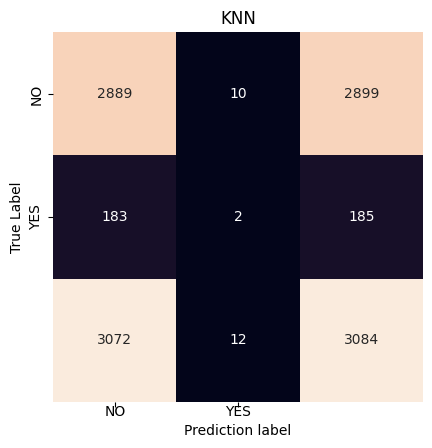

Accuracy: 0.9374189364461738
Precision: 0.16666666666666666
F1 score: 0.020304568527918784
Recall: 0.010810810810810811

 clasification report:
               precision    recall  f1-score   support

          No       0.94      1.00      0.97      2899
         Yes       0.17      0.01      0.02       185

    accuracy                           0.94      3084
   macro avg       0.55      0.50      0.49      3084
weighted avg       0.89      0.94      0.91      3084



In [69]:
# KNN
knn_y_pred = knn.predict(X_test.values)
model_evaluation(knn_y_pred,"KNN")

In [70]:
evaluate(knn, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     11598
           1       1.00      0.13      0.23       738

    accuracy                           0.95     12336
   macro avg       0.97      0.56      0.60     12336
weighted avg       0.95      0.95      0.93     12336

------
Assuming 1 as positive, we get for Data Train:

True Positive: 94
True Negative: 11598
False Positive: 0
False Negative: 644

Accuracy Data Train: 0.9477950713359273
Precision Data Train: 1.0
Recall Data Train: 0.12737127371273713
F1-Score Data Train: 0.22596153846153846
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.17      0.01      0.02       185

    accuracy                           0.94      3084
   macro avg       0.55      0.50      0.49      3084
weight

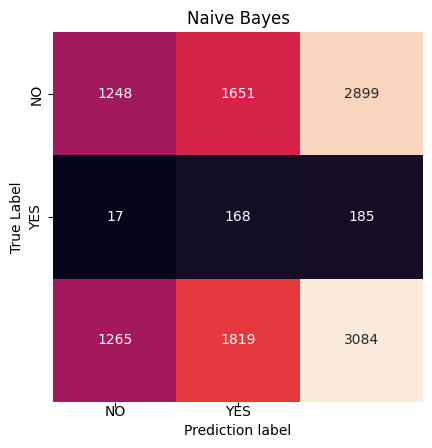

Accuracy: 0.4591439688715953
Precision: 0.09235843870258384
F1 score: 0.16766467065868265
Recall: 0.9081081081081082

 clasification report:
               precision    recall  f1-score   support

          No       0.99      0.43      0.60      2899
         Yes       0.09      0.91      0.17       185

    accuracy                           0.46      3084
   macro avg       0.54      0.67      0.38      3084
weighted avg       0.93      0.46      0.57      3084



In [71]:
# Naive Bayes
nb_y_pred = naive_model.predict(X_test)
model_evaluation(nb_y_pred,"Naive Bayes")

In [72]:
evaluate(naive_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     11598
           1       0.09      0.93      0.17       738

    accuracy                           0.46     12336
   macro avg       0.54      0.68      0.39     12336
weighted avg       0.94      0.46      0.58     12336

------
Assuming 1 as positive, we get for Data Train:

True Positive: 687
True Negative: 5045
False Positive: 6553
False Negative: 51

Accuracy Data Train: 0.4646562905317769
Precision Data Train: 0.09488950276243094
Recall Data Train: 0.9308943089430894
F1-Score Data Train: 0.17222361494108798
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.43      0.60      2899
           1       0.09      0.91      0.17       185

    accuracy                           0.46      3084
   macro avg       0.54      0.67      0.38

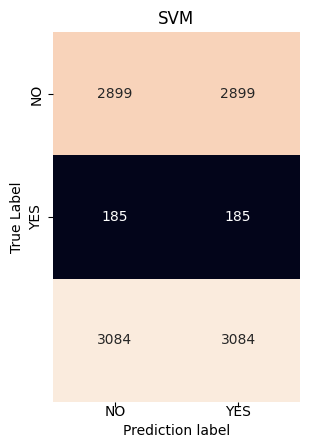

Accuracy: 0.9400129701686122
Precision: 0.0
F1 score: 0.0
Recall: 0.0

 clasification report:
               precision    recall  f1-score   support

          No       0.94      1.00      0.97      2899
         Yes       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

In [73]:
# SVM
svm_y_pred = svm_model.predict(X_test)
model_evaluation(svm_y_pred,"SVM")

In [74]:
evaluate(svm_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11598
           1       0.00      0.00      0.00       738

    accuracy                           0.94     12336
   macro avg       0.47      0.50      0.48     12336
weighted avg       0.88      0.94      0.91     12336

------
Assuming 1 as positive, we get for Data Train:

True Positive: 0
True Negative: 11598
False Positive: 0
False Negative: 738

Accuracy Data Train: 0.9401750972762646
Precision Data Train: nan
Recall Data Train: 0.0
F1-Score Data Train: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-66-7c483077a559>:20: RuntimeWarning: invalid valu

======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084

------
Assuming 1 as positive, we get:

True Positive: 0
True Negative: 2899
False Positive: 0
False Negative: 185

Accuracy Data Test: 0.9400129701686122
Precision Data Test: nan
Recall Data Test: 0.0
F1-Score Data Test: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-66-7c483077a559>:45: RuntimeWarning: invalid valu

# Conclusion

The best model are Logistic Regression and SVM due to the percentage of training and testing accuracy is the same.

# Link
1. Kaggle
2. GitHub
3. LindkedIn